In [22]:
# The following tasks are to be performed:
# •Read the Data from Yahoo finance website directly.•Perform cleaning.
# •What was the change in stock datareaderice over time?
# •Visualize the change in a stock’s volume being traded, over time?
# •What was the moving average of various stocks?
# •What was the daily return average of a stock?
# •Adda new column ‘Trend’ whose values are based on the 'Daily Return'.
# •Visualize trend frequency through a Pie Chart.
# •What was the correlation between the daily returns of different stocks?


## Importing All libraries

In [23]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas_datareader as datareader
import datetime as datetime_module

In [24]:
### Importing Only one Stock date

### Amazon stock data from 2016 to 2022

In [25]:
amazon_data=datareader.data.get_data_yahoo('AMZN',start='2016-01-01',end='2020-12-31')
amazon_data.head()
## Viewing top 5 data of our dataset        

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,34.387501,33.794498,34.304001,33.794498,74992000,33.794498
2016-01-04,32.886002,31.375500,32.814499,31.849501,186290000,31.849501
2016-01-05,32.345501,31.382500,32.342999,31.689501,116452000,31.689501
2016-01-06,31.989500,31.015499,31.100000,31.632500,106584000,31.632500
2016-01-07,31.500000,30.260500,31.090000,30.396999,141498000,30.396999


In [26]:
# Extracting index data and making a new column Date
amazon_data['Date']=amazon_data.index
amazon_data.reset_index(drop=True,inplace=True)
amazon_data.head()

,High,Low,Open,Close,Volume,Adj Close,Date
0,34.387501,33.794498,34.304001,33.794498,74992000,33.794498,2015-12-31
1,32.886002,31.375500,32.814499,31.849501,186290000,31.849501,2016-01-04
2,32.345501,31.382500,32.342999,31.689501,116452000,31.689501,2016-01-05
3,31.989500,31.015499,31.100000,31.632500,106584000,31.632500,2016-01-06
4,31.500000,30.260500,31.090000,30.396999,141498000,30.396999,2016-01-07


In [27]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   High       1260 non-null   float64       
 1   Low        1260 non-null   float64       
 2   Open       1260 non-null   float64       
 3   Close      1260 non-null   float64       
 4   Volume     1260 non-null   int64         
 5   Adj Close  1260 non-null   float64       
 6   Date       1260 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


#### Total 1260 rows with 7 columns of 5 float type,1 integer and 1 datetime type 

In [28]:
amazon_data.describe(include='all',datetime_is_numeric=True)

,High,Low,Open,Close,Volume,Adj Close,Date
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260
mean,78.657400,76.915269,77.848503,77.824243,8.833809e+07,77.824243,2018-07-02 14:52:34.285714432
min,24.674999,23.700001,23.900499,24.103500,1.762600e+07,24.103500,2015-12-31 00:00:00
25%,44.635250,44.126499,44.243750,44.303625,5.844900e+07,44.303625,2017-04-02 06:00:00
50%,81.186752,79.544003,80.200249,80.275501,7.644500e+07,80.275501,2018-07-02 12:00:00
75%,95.000626,93.231249,94.264126,94.218496,1.054185e+08,94.218496,2019-10-02 06:00:00
max,177.612503,174.334503,177.350006,176.572495,3.313000e+08,176.572495,2020-12-31 00:00:00
std,37.846071,36.733726,37.340840,37.292625,4.308230e+07,37.292625,NaN


### extracting  the mean, standard deviantion and other usefull things 

### As from the above output we can see that the close and Adj Close column shares almost same data.
Let us verify using the plotting

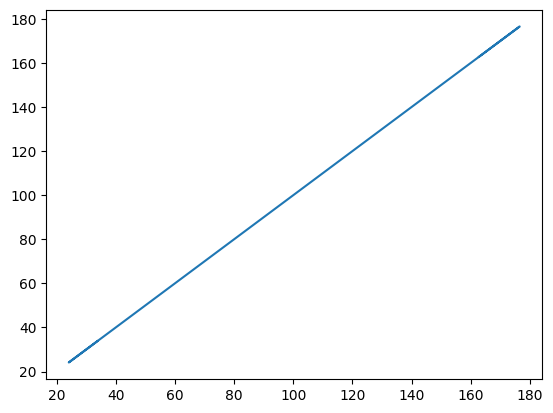

In [29]:
#Ploting the Adj Close and close variable 
mp.plot(amazon_data['Adj Close'],amazon_data['Close'])

In [30]:
amazon_data['Adj Close'].equals(amazon_data['Close'])

True

### From the above plot and by equal funtion we can clearliy say that both are similar and we can drop one of them

In [31]:
amazon_data.drop(['Adj Close'], inplace=True,axis=1)
amazon_data.head()

,High,Low,Open,Close,Volume,Date
0,34.387501,33.794498,34.304001,33.794498,74992000,2015-12-31
1,32.886002,31.375500,32.814499,31.849501,186290000,2016-01-04
2,32.345501,31.382500,32.342999,31.689501,116452000,2016-01-05
3,31.989500,31.015499,31.100000,31.632500,106584000,2016-01-06
4,31.500000,30.260500,31.090000,30.396999,141498000,2016-01-07


In [32]:
#### EDA

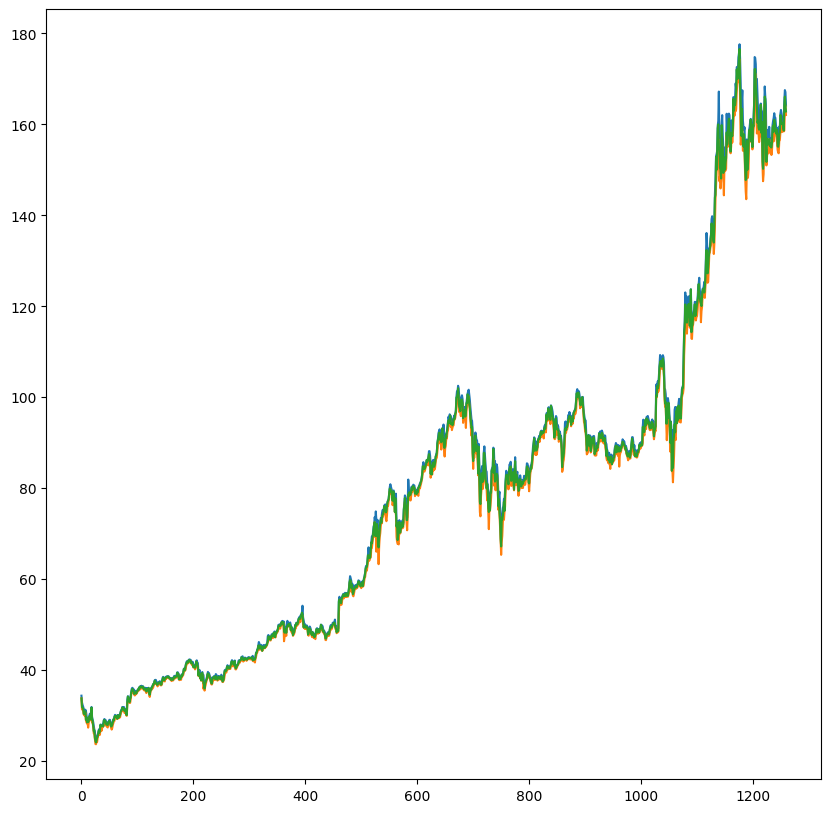

In [33]:
mp.figure(figsize=(10,10))
mp.plot(amazon_data['High'])
mp.plot(amazon_data['Low'])
mp.plot(amazon_data['Close'])
mp.show()

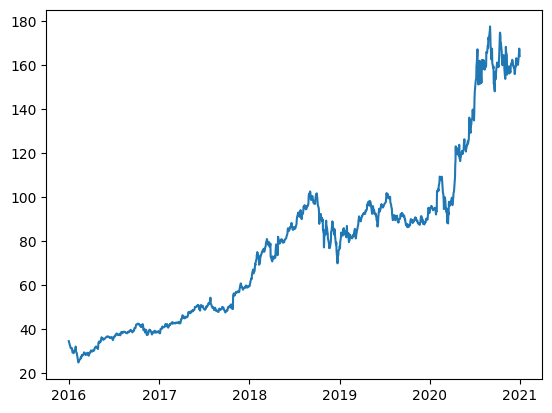

In [34]:
mp.plot(amazon_data['Date'],amazon_data['High'])

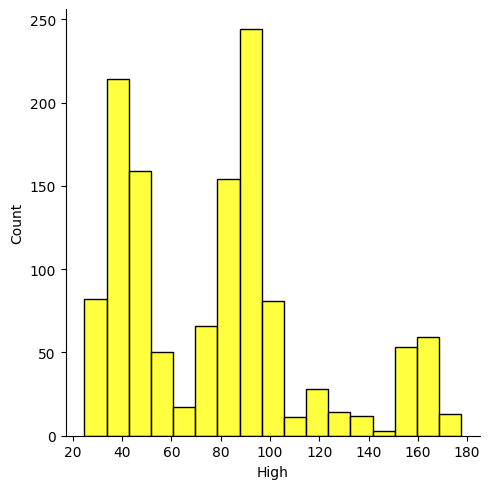

In [35]:
sns.displot(amazon_data['High'],color='yellow')

<AxesSubplot: xlabel='Low', ylabel='Volume'>

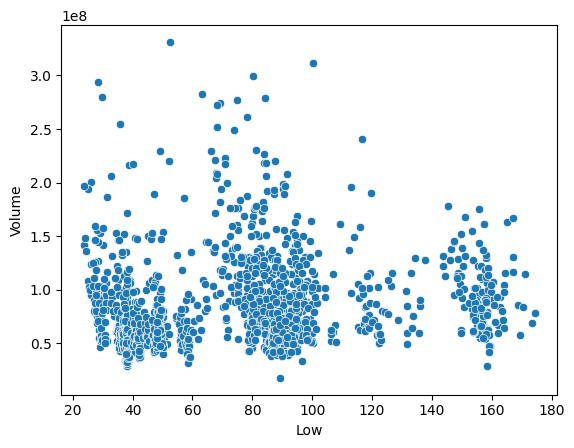

In [36]:
sns.scatterplot(x=amazon_data['Low'],y=amazon_data['Volume'])

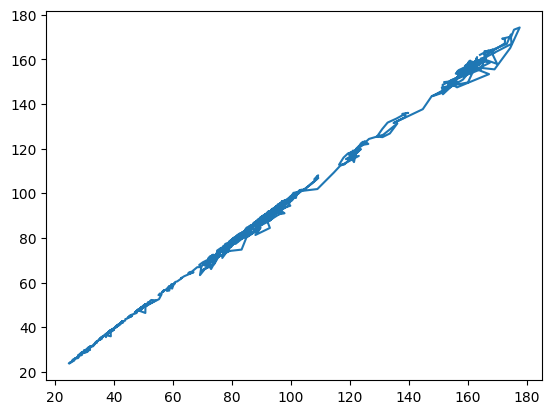

In [37]:
mp.plot(amazon_data['High'],amazon_data['Low'])

#### What was the change in stock price over time ?

Text(0, 0.5, 'Close')

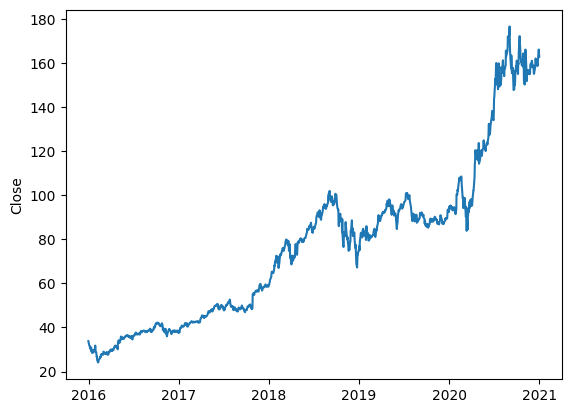

In [38]:
mp.plot(amazon_data['Date'],amazon_data['Close'])
mp.ylabel('Close')

##### Visualize the change in a stock’s volume being traded, over time?

<AxesSubplot: xlabel='Date', ylabel='Volume'>

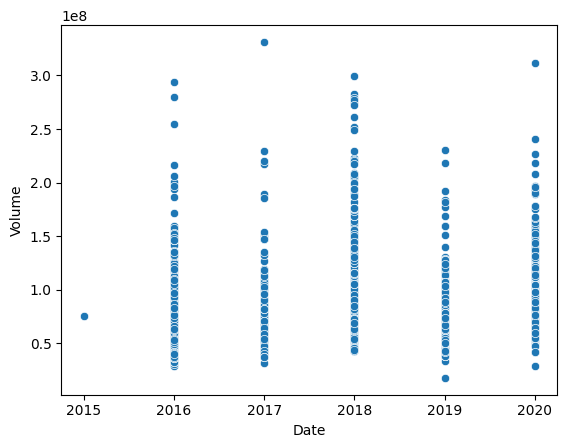

In [39]:
sns.scatterplot(x=amazon_data['Date'].dt.year,y=amazon_data['Volume'])

<AxesSubplot: xlabel='Date', ylabel='Volume'>

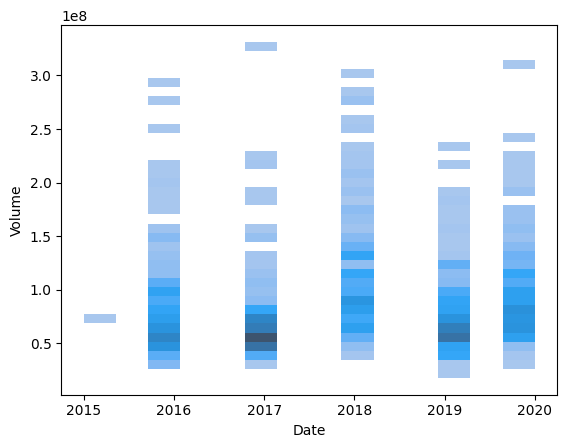

In [40]:
sns.histplot(x=amazon_data['Date'].dt.year,y=amazon_data['Volume'])

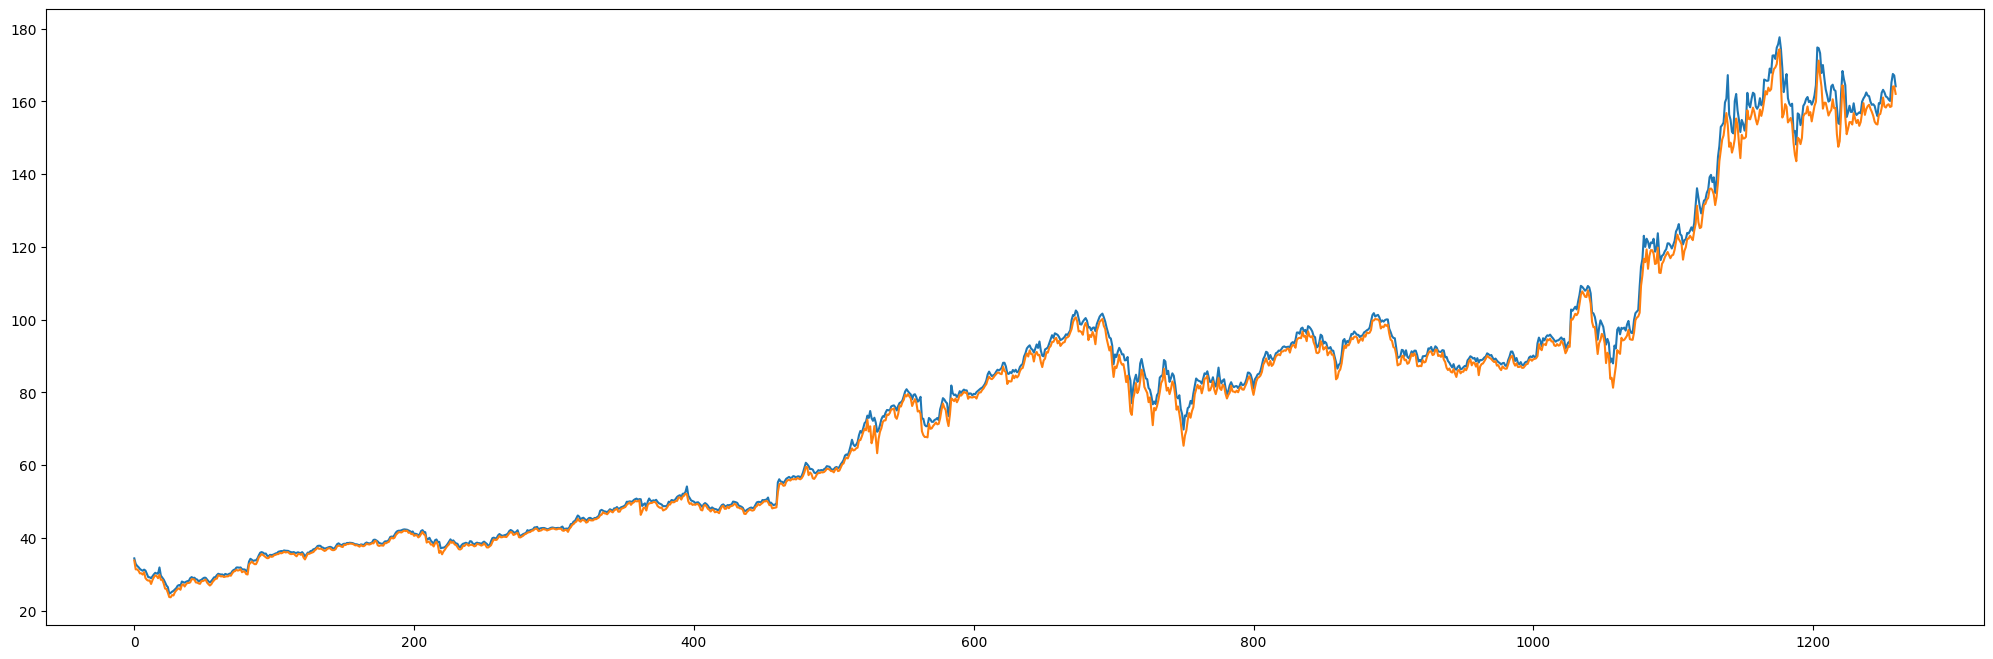

In [41]:
mp.figure(figsize=(25,8))
mp.plot(amazon_data['High'])
mp.plot(amazon_data['Low'])

mp.show()

In [42]:
# sns.pairplot(amazon_data)

### Making a month_name column to extract month name from date column

In [43]:
amazon_data['month_name']=range(0,1260)

In [44]:

import calendar
for i in range(amazon_data.shape[0]):    
    amazon_data['month_no']=amazon_data['Date'].dt.month
    amazon_data['month_name'][i]=calendar.month_name[amazon_data['month_no'][i]]



C:\Users\shivam1\AppData\Local\Temp\ipykernel_13728\3533019317.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
amazon_data['month_name'].value_counts()

August       112
October      111
March        109
May          107
June         107
July         105
December     104
April        103
November     103
January      102
September    101
February      96
Name: month_name, dtype: int64

In [46]:
amazon_data.sample()

,High,Low,Open,Close,Volume,Date,month_name,month_no
292,42.741501,42.4505,42.6525,42.653999,55202000,2017-03-01,March,3


In [47]:
amazon_data.drop('month_no',axis=1,inplace=True)

<AxesSubplot: xlabel='month_name', ylabel='Open'>

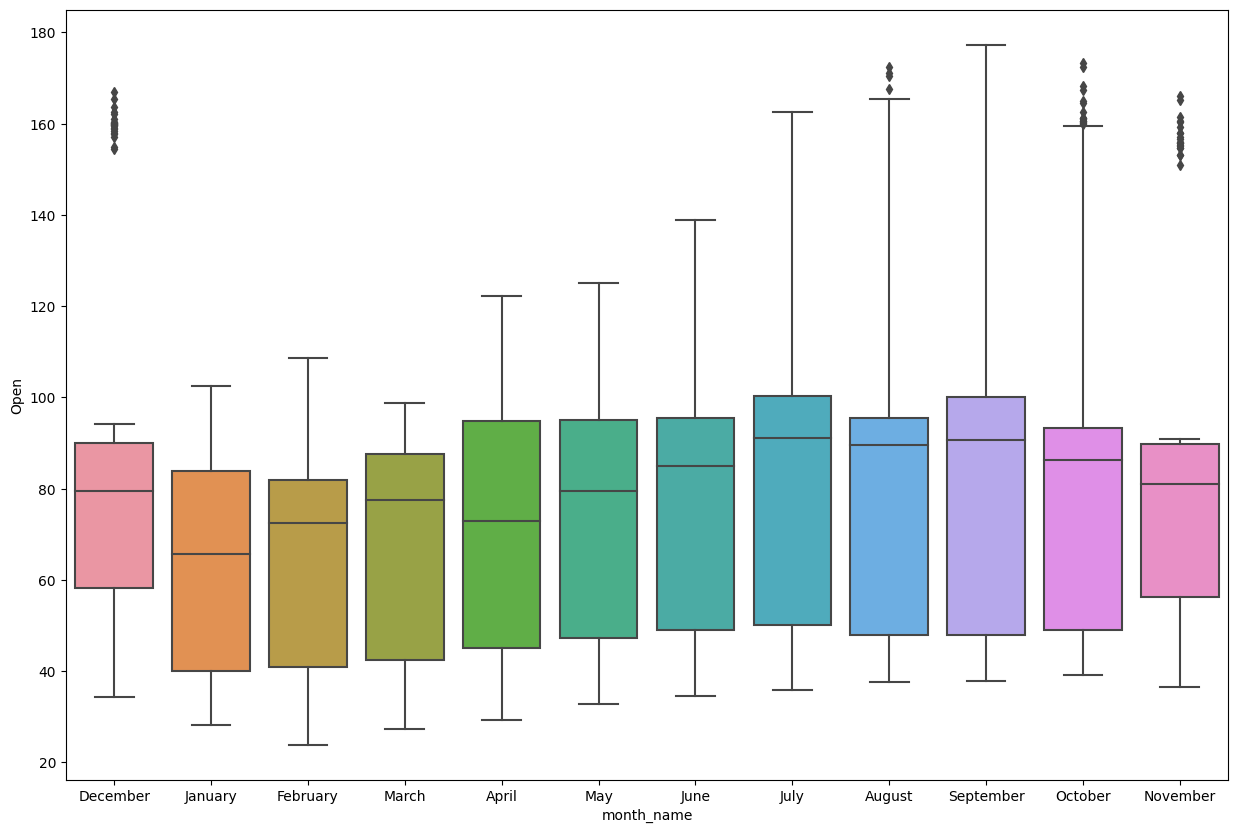

In [48]:
mp.figure(figsize=(15,10))
sns.boxplot(y=amazon_data['Open'],x=amazon_data['month_name'])

In [49]:
amazon_data['Semi_year']=np.where(amazon_data['month_name'].isin(['January','February','March','Adatareaderil','May','June']),'First_Half_yearly','Second_Half_yearly')

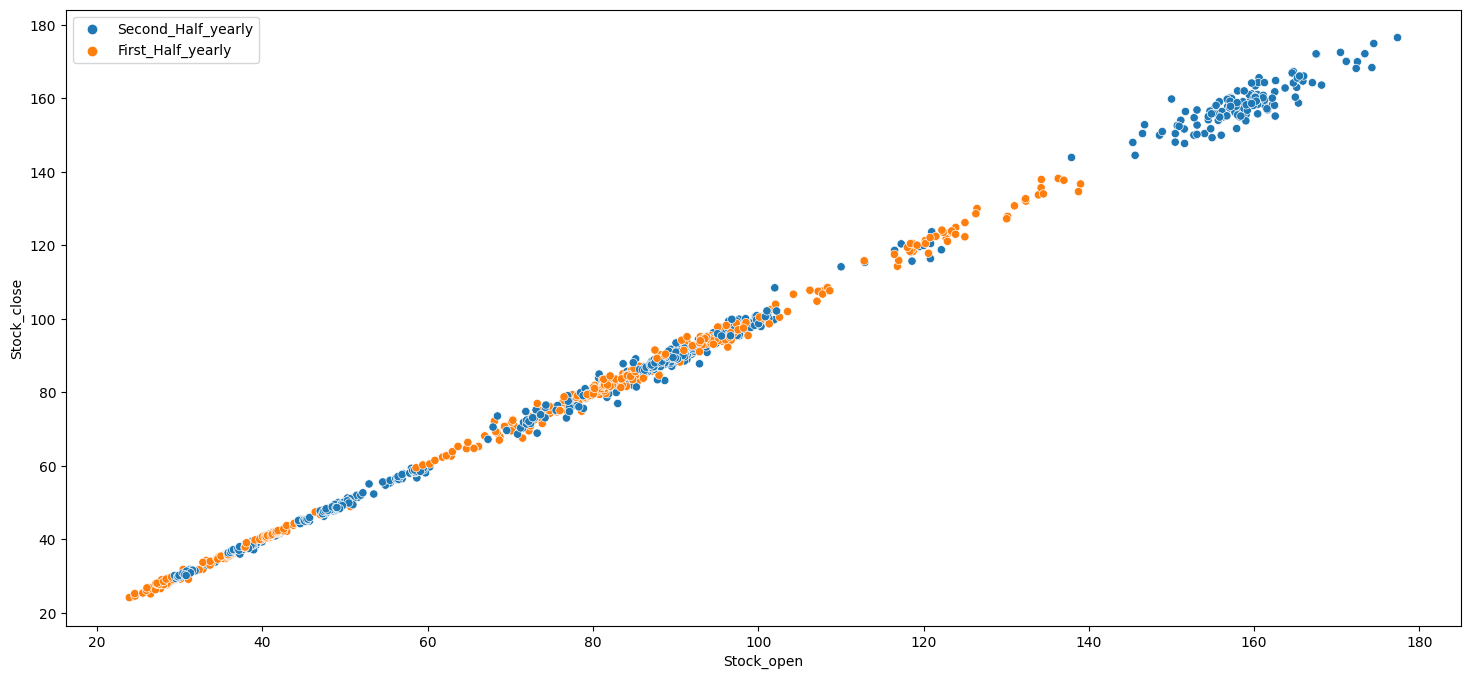

In [50]:
mp.figure(figsize=(18,8))
sns.scatterplot(x=amazon_data['Open'],y=amazon_data['Close'],hue=amazon_data['Semi_year'])
mp.xlabel('Stock_open')
mp.ylabel('Stock_close')
mp.legend()

<AxesSubplot: xlabel='Semi_year', ylabel='Close'>

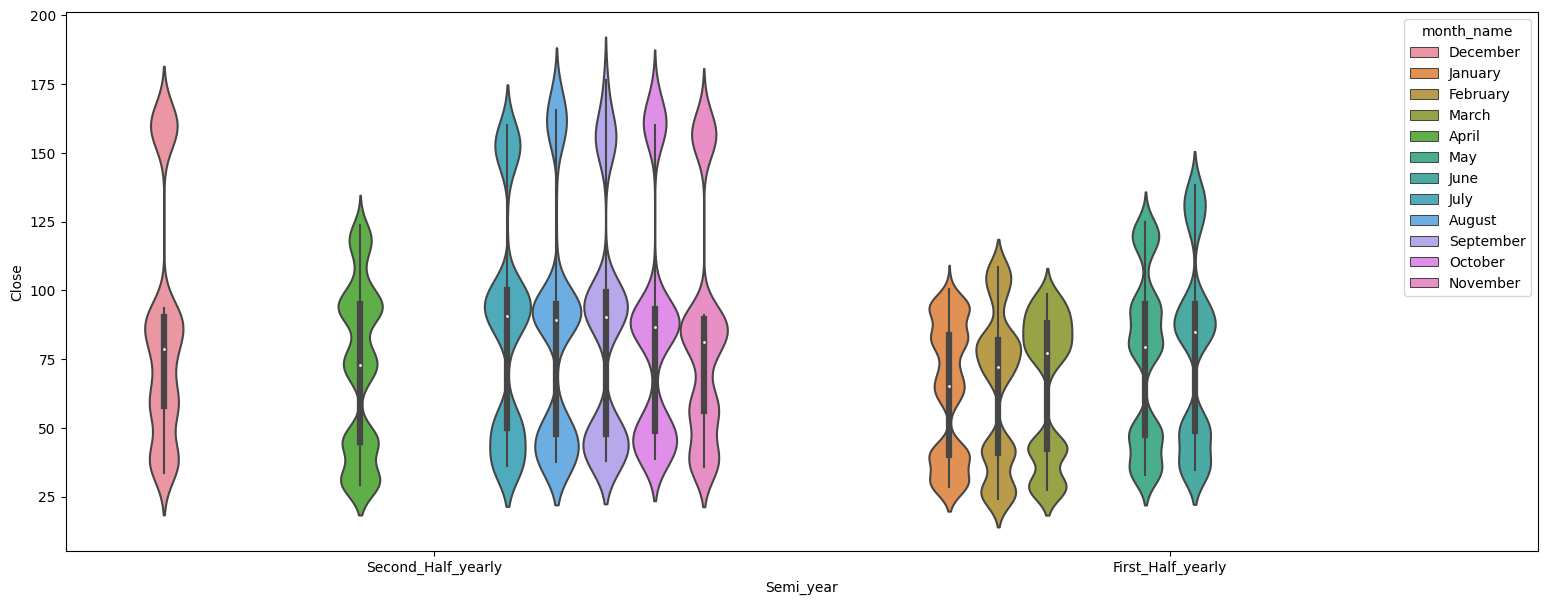

In [51]:
mp.figure(figsize=(19,7))
sns.violinplot(y=amazon_data['Close'],hue=amazon_data['month_name'],x=amazon_data['Semi_year'],bw=.18,scal='count')

### Violen plot is similar as boxplot but its also show the distribution of data

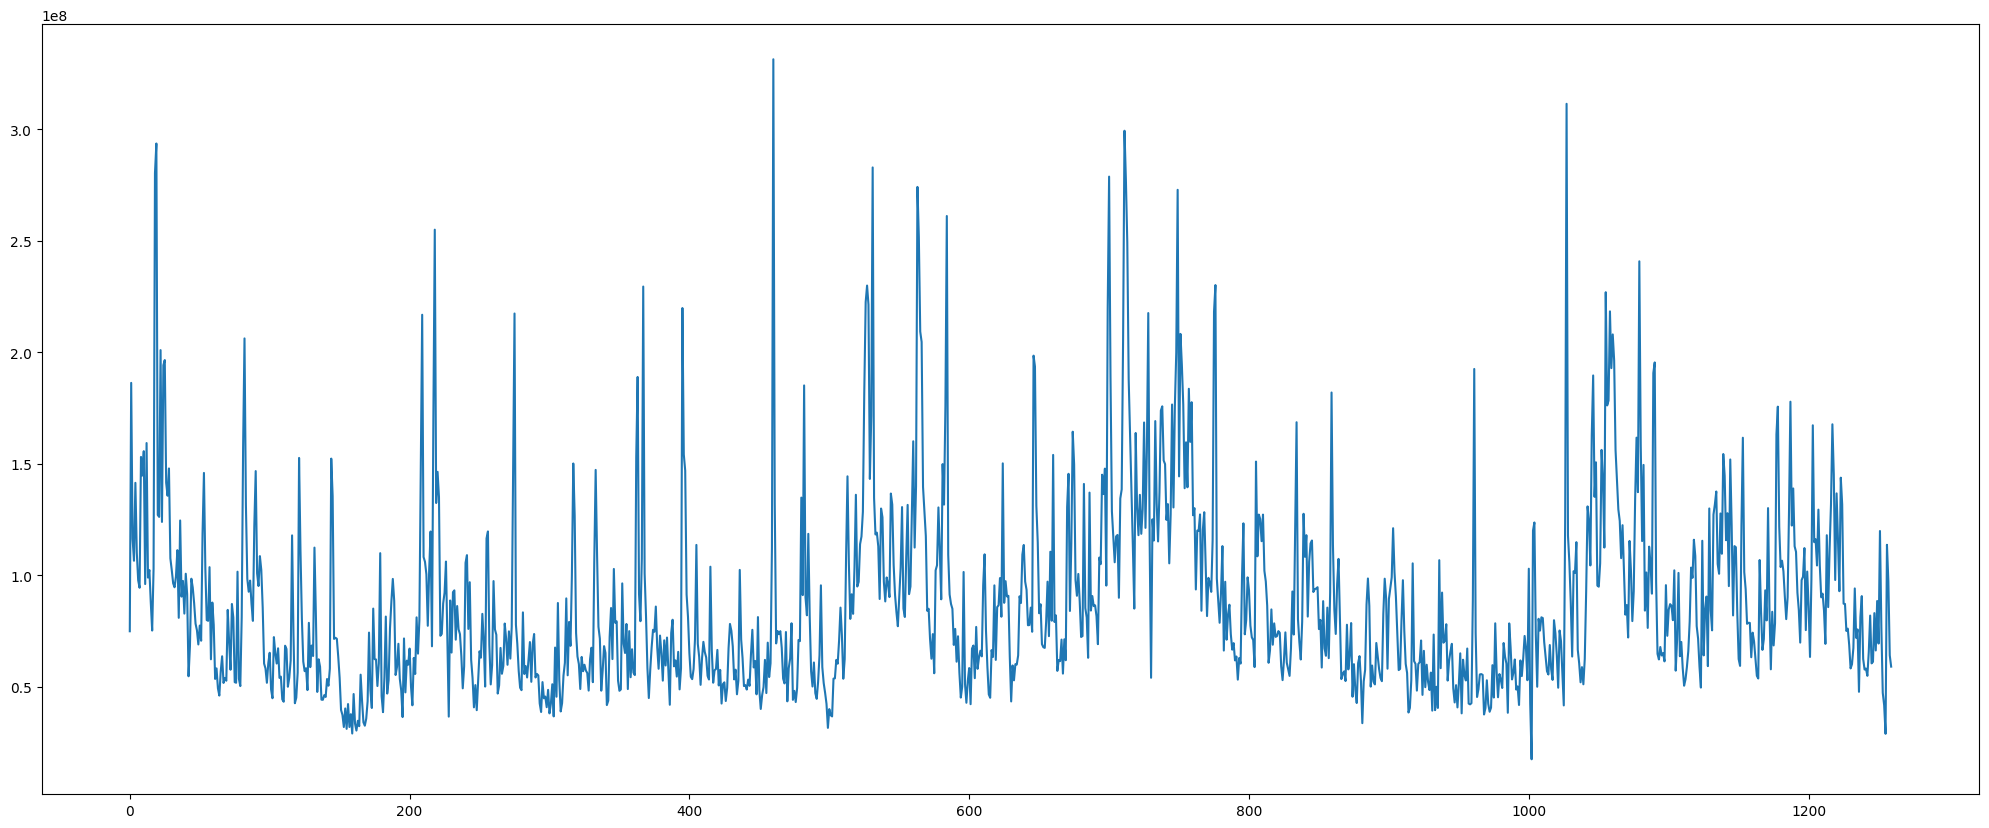

In [52]:
mp.figure(figsize=(25,10))
mp.plot(amazon_data['Volume'])

### Importing different type of companies stocks

In [53]:
Stock_Data=datareader.data.get_data_yahoo(['AMZN','MSFT','AAPL','GOOG'],start='2016-01-01',end='2020-12-31')
Stock_Data.head()

Attributes  Adj Close                                       Close             \
Symbols          AMZN       MSFT       AAPL       GOOG       AMZN       MSFT   
Date                                                                           
2015-12-31  33.794498  49.880527  24.090897  37.944000  33.794498  55.480000   
2016-01-04  31.849501  49.269157  24.111498  37.091999  31.849501  54.799999   
2016-01-05  31.689501  49.493923  23.507282  37.129002  31.689501  55.049999   
2016-01-06  31.632500  48.594849  23.047253  37.181000  31.632500  54.049999   
2016-01-07  30.396999  46.904594  22.074553  36.319500  30.396999  52.169998   

Attributes                             High             ...        Low  \
Symbols          AAPL       GOOG       AMZN       MSFT  ...       AAPL   
Date                                                    ...              
2015-12-31  26.315001  37.944000  34.387501  56.189999  ...  26.205000   
2016-01-04  26.337500  37.091999  32.886002  54.799999  ...  25.500000   
2016-01-05  25.677500  37.129002  32.345501  55.389999  ...  25.602501   
2016-01-06  25.174999  37.181000  31.989500  54.400002  ...  24.967501   
2016-01-07  24.112499  36.319500  31.500000  53.490002  ...  24.107500   

Attributes                  Open                                   \
Symbols          GOOG       AMZN       MSFT       AAPL       GOOG   
Date                                                                
2015-12-31  37.917000  34.304001  56.040001  26.752501  38.474998   
2016-01-04  36.562901  32.814499  54.320000  25.652500  37.150002   
2016-01-05  36.931999  32.342999  54.930000  26.437500  37.322498   
2016-01-06  36.445999  31.100000  54.320000  25.139999  36.500000   
2016-01-07  35.952999  31.090000  52.700001  24.670000  36.515499   

Attributes       Volume                                       
Symbols            AMZN        MSFT         AAPL        GOOG  
Date                                                          
2015-12-31   74992000.0  27334100.0  163649200.0  30018000.0  
2016-01-04  186290000.0  53778000.0  270597600.0  65456000.0  
2016-01-05  116452000.0  34079700.0  223164000.0  39014000.0  
2016-01-06  106584000.0  39518900.0  273829600.0  38940000.0  
2016-01-07  141498000.0  56564900.0  324377600.0  59274000.0  

[5 rows x 24 columns]

In [54]:
Stock_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  1260 non-null   float64
 1   (Adj Close, MSFT)  1260 non-null   float64
 2   (Adj Close, AAPL)  1260 non-null   float64
 3   (Adj Close, GOOG)  1260 non-null   float64
 4   (Close, AMZN)      1260 non-null   float64
 5   (Close, MSFT)      1260 non-null   float64
 6   (Close, AAPL)      1260 non-null   float64
 7   (Close, GOOG)      1260 non-null   float64
 8   (High, AMZN)       1260 non-null   float64
 9   (High, MSFT)       1260 non-null   float64
 10  (High, AAPL)       1260 non-null   float64
 11  (High, GOOG)       1260 non-null   float64
 12  (Low, AMZN)        1260 non-null   float64
 13  (Low, MSFT)        1260 non-null   float64
 14  (Low, AAPL)        1260 non-null   float64
 15  (Low, GOOG)        1260 non-null   float64
 16  (Open,

In [55]:
Stock_Data.sample()

Attributes Adj Close                                      Close              \
Symbols         AMZN        MSFT       AAPL       GOOG     AMZN        MSFT   
Date                                                                          
2018-09-07   97.6035  103.512016  53.212685  58.241501  97.6035  108.209999   

Attributes                             High              ...        Low  \
Symbols          AAPL       GOOG       AMZN        MSFT  ...       AAPL   
Date                                                     ...              
2018-09-07  55.325001  58.241501  98.760002  108.720001  ...  55.177502   

Attributes                  Open                                    \
Symbols          GOOG       AMZN        MSFT       AAPL       GOOG   
Date                                                                 
2018-09-07  57.860748  96.935501  108.230003  55.462502  57.933498   

Attributes      Volume                                       
Symbols           AMZN        MSFT         AAPL        GOOG  
Date                                                         
2018-09-07  97852000.0  22498600.0  150479200.0  28026000.0  

[1 rows x 24 columns]

In [56]:
Stock_Data.describe()

Attributes    Adj Close                                               Close  \
Symbols            AMZN         MSFT         AAPL         GOOG         AMZN   
count       1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean          77.824243   105.969712    49.971733    54.491041    77.824243   
std           37.292625    50.883464    26.161657    13.457744    37.292625   
min           24.103500    44.161434    20.914911    33.412998    24.103500   
25%           44.303625    60.768252    33.309752    41.826625    44.303625   
50%           80.275501    96.493225    42.158092    54.131001    80.275501   
75%           94.218496   135.100784    54.953463    61.511748    94.218496   
max          176.572495   227.637238   135.068604    91.399498   176.572495   

Attributes                                                High               \
Symbols            MSFT         AAPL         GOOG         AMZN         MSFT   
count       1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean         110.397008    51.721813    54.491041    78.657400   111.434008   
std           50.495040    26.001663    13.457744    37.846071    51.144165   
min           48.430000    22.584999    33.412998    24.674999    49.150002   
25%           65.450001    35.439376    41.826625    44.635250    65.740000   
50%          101.130001    43.966251    54.131001    81.186752   101.904999   
75%          139.070000    56.777499    61.511748    95.000626   140.390003   
max          231.649994   136.690002    91.399498   177.612503   232.860001   

Attributes  ...          Low                      Open               \
Symbols     ...         AAPL         GOOG         AMZN         MSFT   
count       ...  1260.000000  1260.000000  1260.000000  1260.000000   
mean        ...    51.142744    53.953334    77.848503   110.371508   
std         ...    25.561969    13.271508    37.340840    50.477418   
min         ...    22.367500    33.153000    23.900499    48.680000   
25%         ...    35.243749    41.522499    44.243750    65.389999   
50%         ...    43.627501    53.555124    80.200249   101.125000   
75%         ...    56.469999    60.955375    94.264126   139.607498   
max         ...   134.339996    91.132500   177.350006   229.270004   

Attributes                                  Volume                \
Symbols            AAPL         GOOG          AMZN          MSFT   
count       1260.000000  1260.000000  1.260000e+03  1.260000e+03   
mean          51.679663    54.458350  8.833809e+07  2.946823e+07   
std           26.012612    13.431697  4.308230e+07  1.404653e+07   
min           22.500000    33.392502  1.762600e+07  7.425600e+06   
25%           35.452501    41.765501  5.844900e+07  2.064912e+07   
50%           43.865000    54.150751  7.644500e+07  2.569430e+07   
75%           56.983748    61.466251  1.054185e+08  3.360555e+07   
max          138.050003    91.225998  3.313000e+08  1.335030e+08   

Attributes                              
Symbols             AAPL          GOOG  
count       1.260000e+03  1.260000e+03  
mean        1.336600e+08  3.342794e+07  
std         6.149846e+07  1.536682e+07  
min         4.544800e+07  6.936000e+06  
25%         9.311270e+07  2.418900e+07  
50%         1.168112e+08  2.933900e+07  
75%         1.561059e+08  3.777550e+07  
max         5.334788e+08  1.269620e+08  

[8 rows x 24 columns]

### Printing the Adj Close and Close value to see whether these column are same or not.

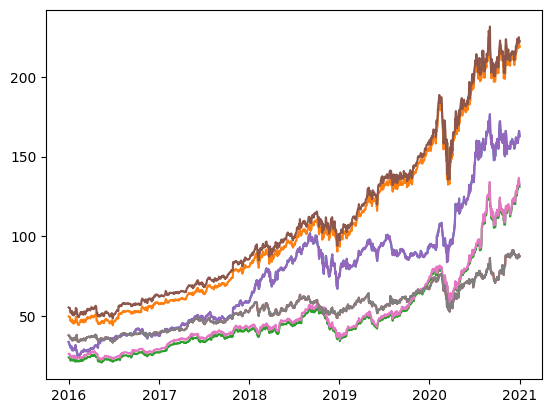

In [57]:
mp.plot(Stock_Data['Adj Close'])
mp.plot(Stock_Data['Close'])
mp.show()

In [58]:

print(Stock_Data['Adj Close']['AMZN'].equals(Stock_Data['Close']['AMZN']))
print(Stock_Data['Adj Close']['GOOG'].equals(Stock_Data['Close']['GOOG']))
print(Stock_Data['Adj Close']['MSFT'].equals(Stock_Data['Close']['MSFT']))
print(Stock_Data['Adj Close']['AAPL'].equals(Stock_Data['Close']['AAPL']))

True
True
False
False


### As from the above we can say the we can remove Adj Close of MSFT and AAPL

In [59]:
Stock_Data.drop(('Adj Close','MSFT'),axis=1,inplace=True)
Stock_Data.drop(('Adj Close','AAPL'),axis=1,inplace=True)
Stock_Data['Adj Close'].sample()

Symbols,AMZN,GOOG
Date,,
2016-06-24,34.948002,33.761002


### Tried multiple way to drop got different errors

In [60]:
##Stock_Data.loc[:,('Adj Close')].drop('MSFT',inplace=True,axis=1,level=1)


In [61]:
##Stock_Data['Adj Close'].drop(['MSFT'],axis=1,inplace=True)


### What was the change in stock price over time?

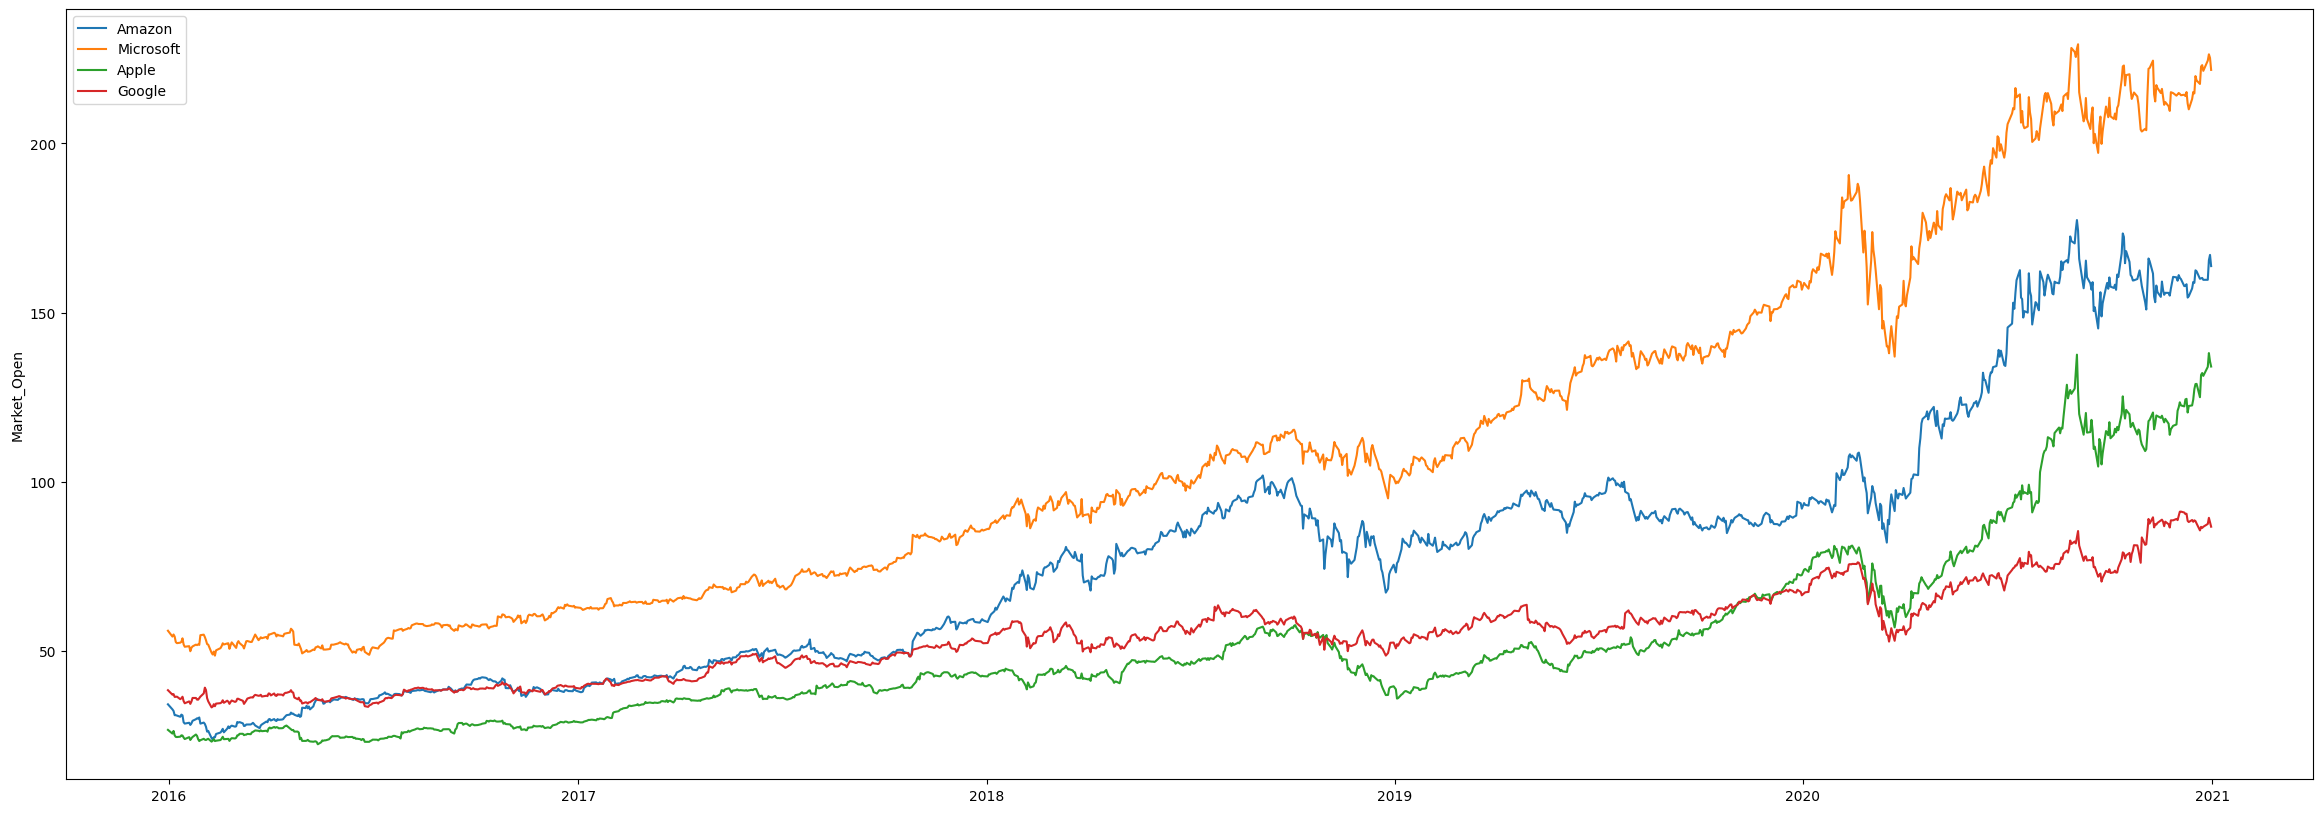

In [62]:
mp.figure(figsize=(29,10))
mp.plot(Stock_Data['Open'],label=['Amazon','Microsoft','Apple','Google'])
mp.ylabel('Market_Open')
mp.legend()
mp.show()


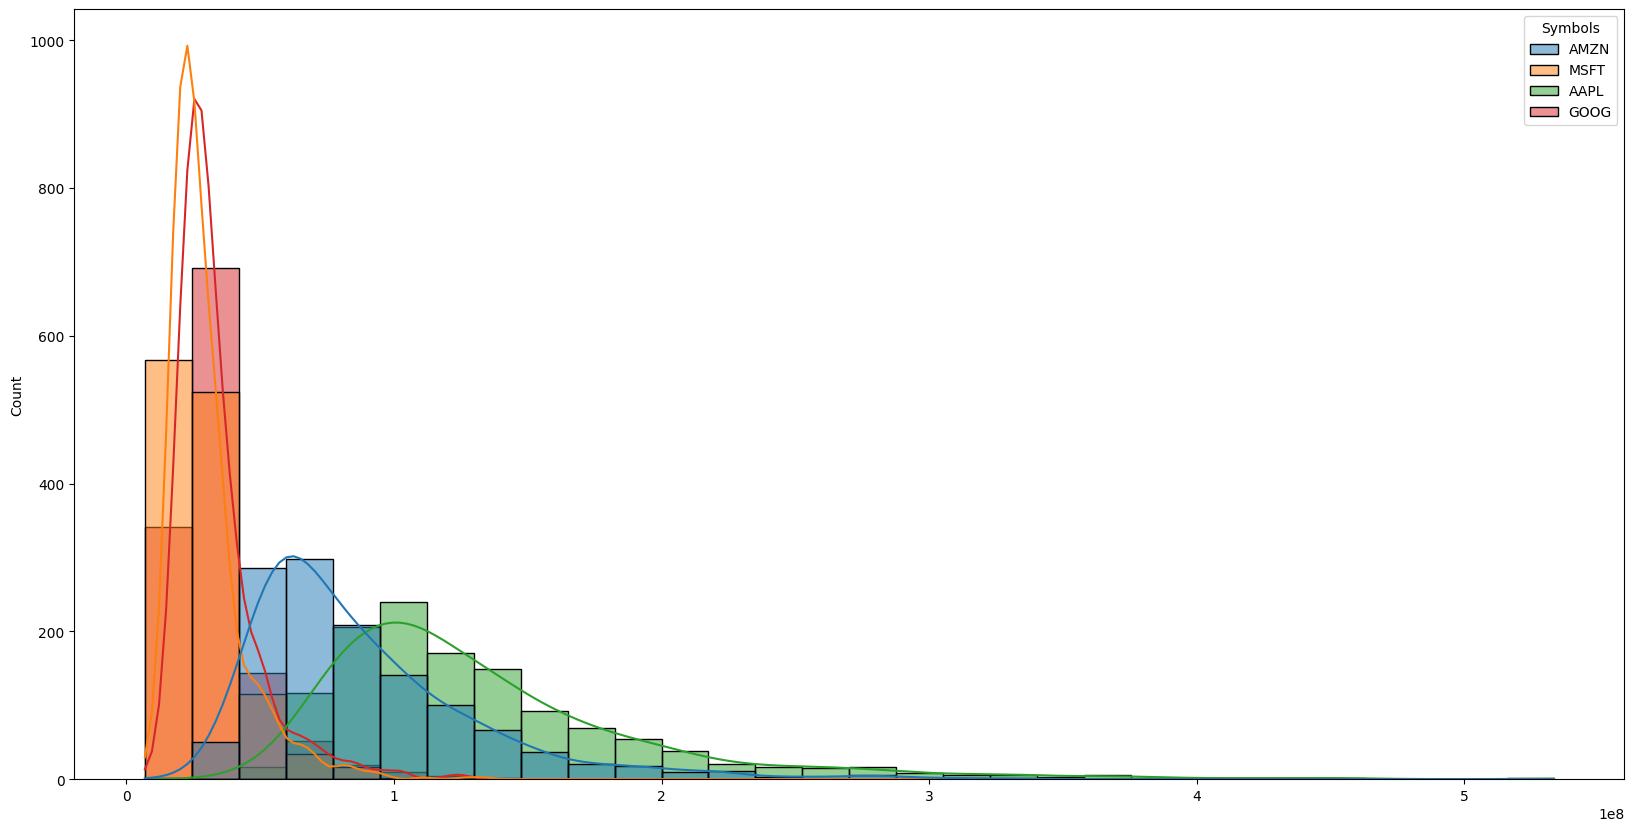

In [63]:
mp.figure(figsize=(20,10))
sns.histplot(Stock_Data['Volume'],color='red',bins=30,kde=True)
mp.show()



####What was the daily return average of a stock?

In [64]:
Stock_Data['Trend_AMZN']=Stock_Data['Close']['AMZN'].pct_change()*100
Stock_Data['Trend_MSFT']=Stock_Data['Close']['MSFT'].pct_change()*100 
Stock_Data['Trend_AAPL']=Stock_Data['Close']['AAPL'].pct_change()*100
Stock_Data['Trend_GOOG']=Stock_Data['Close']['GOOG'].pct_change()*100

In [65]:
Stock_Data.iloc[:,22:].mean()

Attributes  Symbols
Trend_AMZN             0.143260
Trend_MSFT             0.125647
Trend_AAPL             0.146684
Trend_GOOG             0.080296
dtype: float64

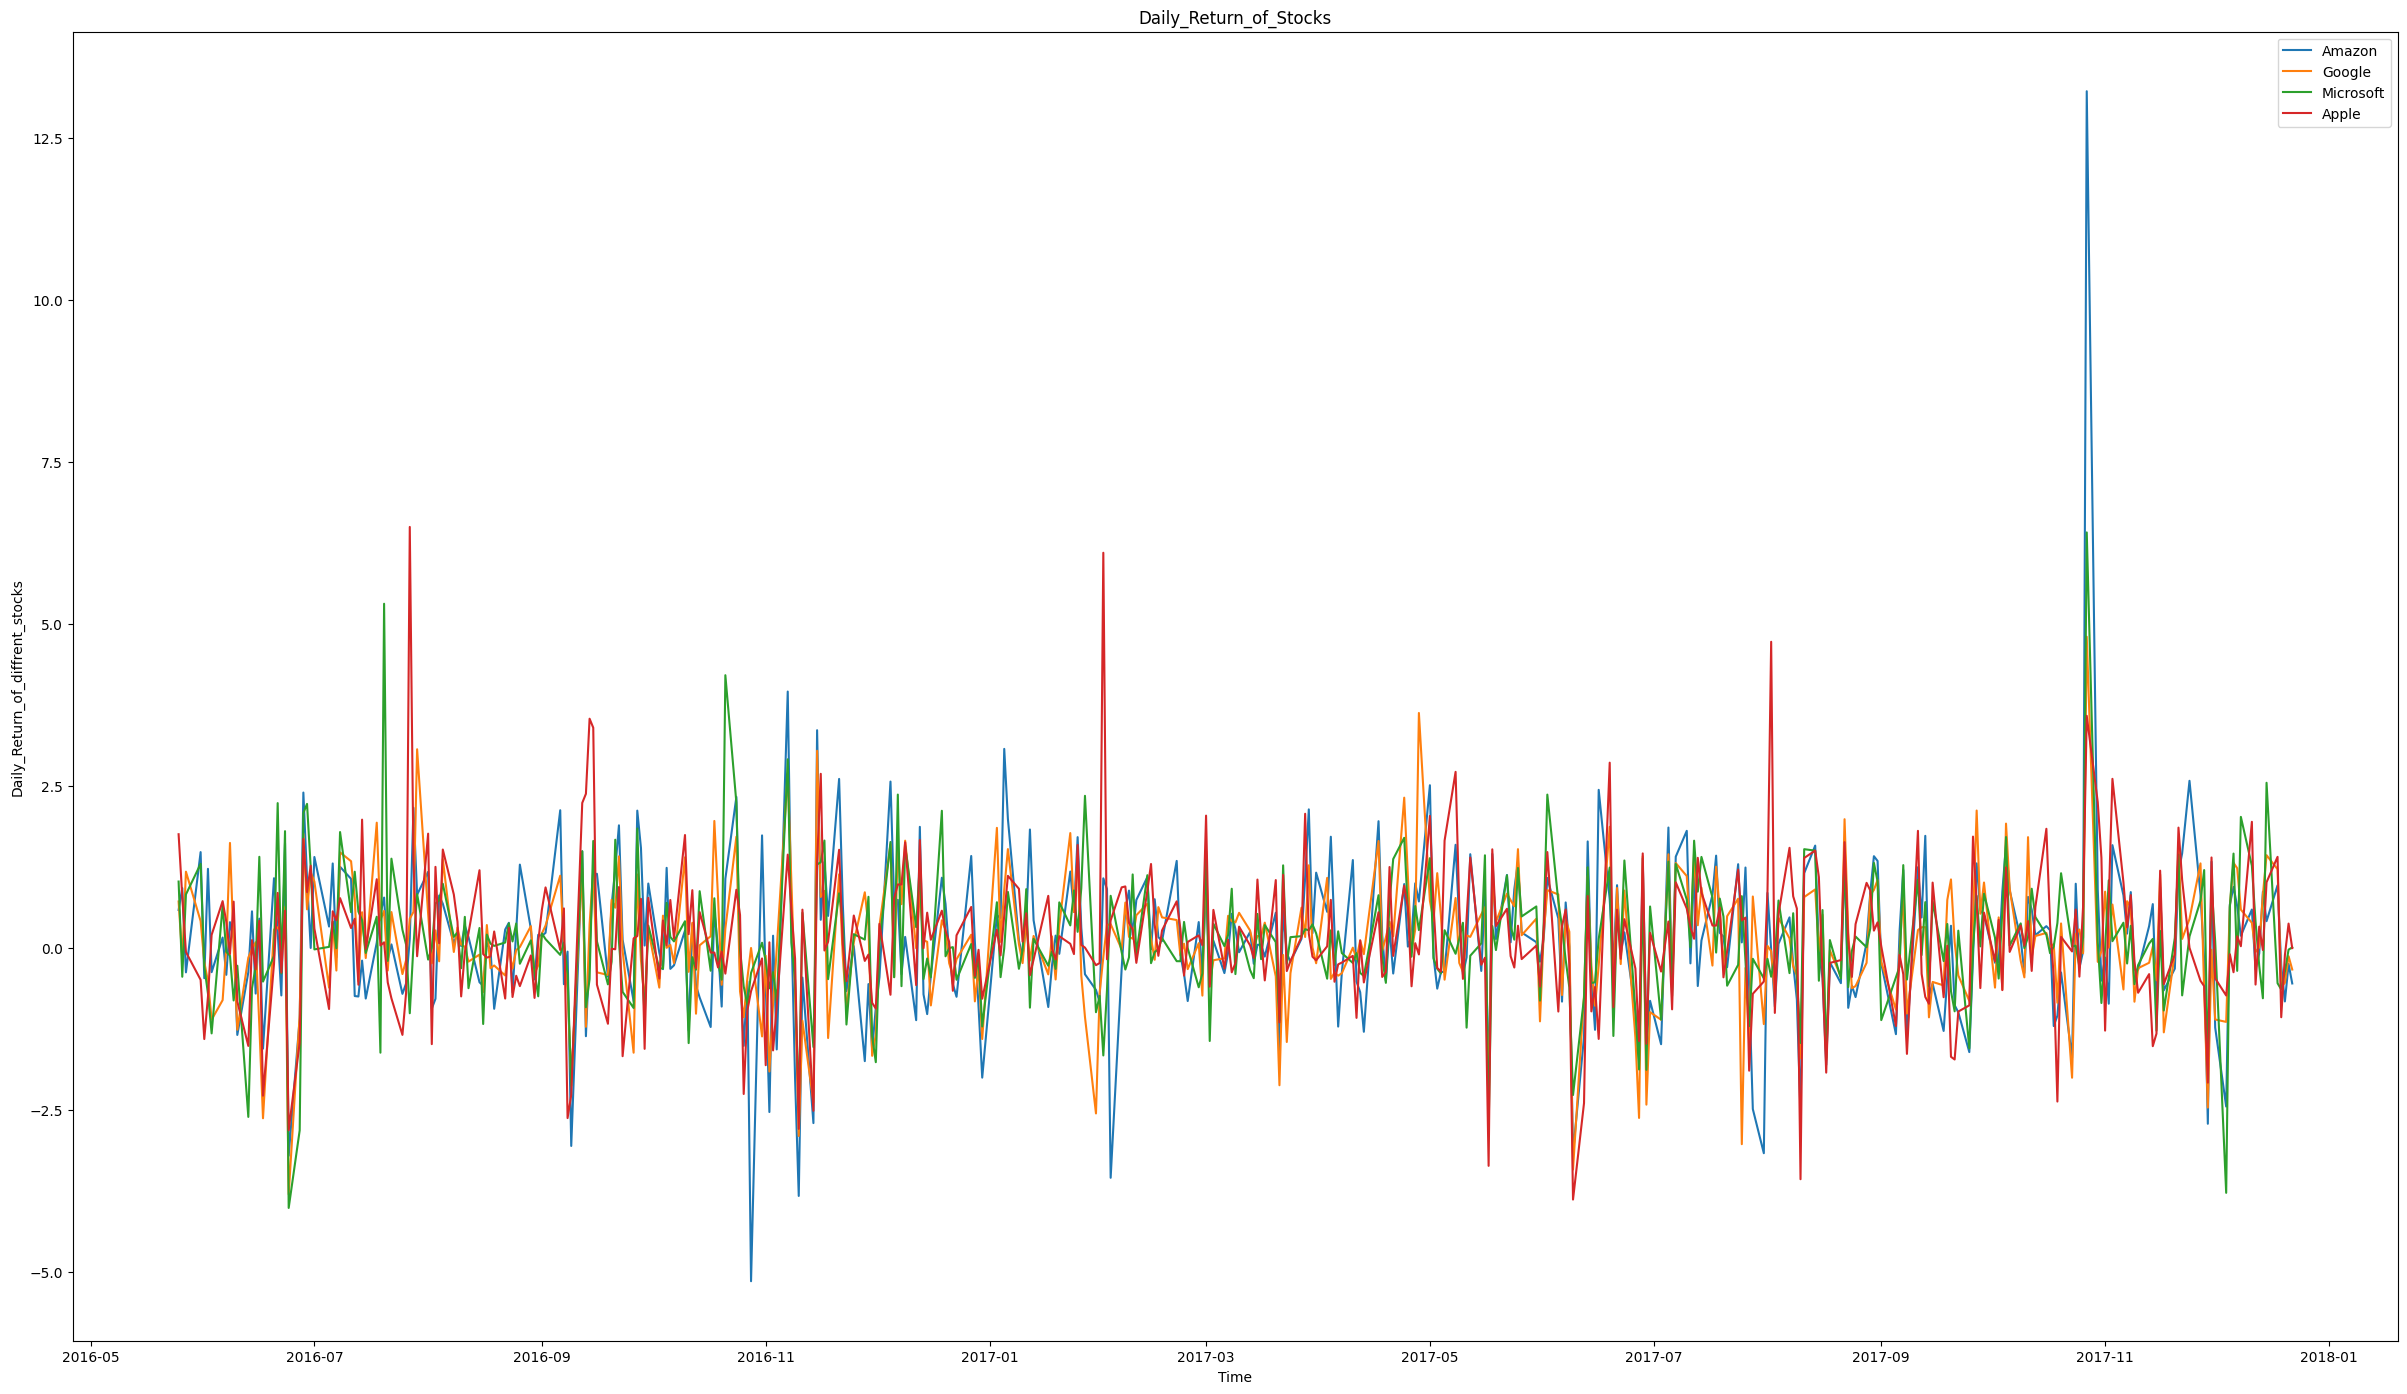

In [66]:
mp.figure(figsize=(30,17))
mp.plot(Stock_Data['Trend_AMZN'][100:500],label='Amazon')
mp.plot(Stock_Data['Trend_GOOG'][100:500],label='Google')
mp.plot(Stock_Data['Trend_MSFT'][100:500],label='Microsoft')
mp.plot(Stock_Data['Trend_AAPL'][100:500],label='Apple')
mp.xlabel('Time')
mp.ylabel('Daily_Return_of_diffrent_stocks')
mp.title('Daily_Return_of_Stocks')
mp.legend()
mp.show()

### Add new column ‘Trend’ whose values are based on the 'Daily Return'.

In [67]:
Stock_Data.iloc[:,22:].head()

Attributes,Trend_AMZN,Trend_MSFT,Trend_AAPL,Trend_GOOG
Symbols,,,,
Date,,,,
2015-12-31,NaN,NaN,NaN,NaN
2016-01-04,-5.755368,-1.225667,0.085499,-2.245417
2016-01-05,-0.502362,0.456204,-2.505932,0.099759
2016-01-06,-0.179874,-1.816530,-1.956968,0.140047
2016-01-07,-3.905794,-3.478263,-4.220457,-2.317043


In [68]:
Stock_Data['Trend_AAPL'].value_counts()

 0.000000    3
 0.085499    1
 1.243130    1
 1.583030    1
-5.811944    1
            ..
 0.397915    1
 0.270089    1
 0.891808    1
 1.007132    1
-0.770265    1
Name: Trend_AAPL, Length: 1257, dtype: int64

### Visualize trend frequency through a Pie Chart

In [69]:
## As we can see we have very low frequency count of our dataframe value, if we try to plot its pie chart it will be hard ti visulize the same as there will be tons of pie

### What was the correlation between the daily returns of different stocks?

### What was the correlation between the daily returns of different stocks?

In [70]:
Stock_Data.iloc[:,22:].corr()

,Attributes,Trend_AMZN,Trend_MSFT,Trend_AAPL,Trend_GOOG
,Symbols,,,,
Attributes,Symbols,,,,
Trend_AMZN,,1.000000,0.683965,0.594493,0.666508
Trend_MSFT,,0.683965,1.000000,0.712203,0.777068
Trend_AAPL,,0.594493,0.712203,1.000000,0.654580
Trend_GOOG,,0.666508,0.777068,0.654580,1.000000


In [71]:
### Tredn_GOOG had strong positive correlation with Trend_MSFT

### Visualizing the correlation using heatmap

<AxesSubplot: xlabel='Attributes-Symbols', ylabel='Attributes-Symbols'>

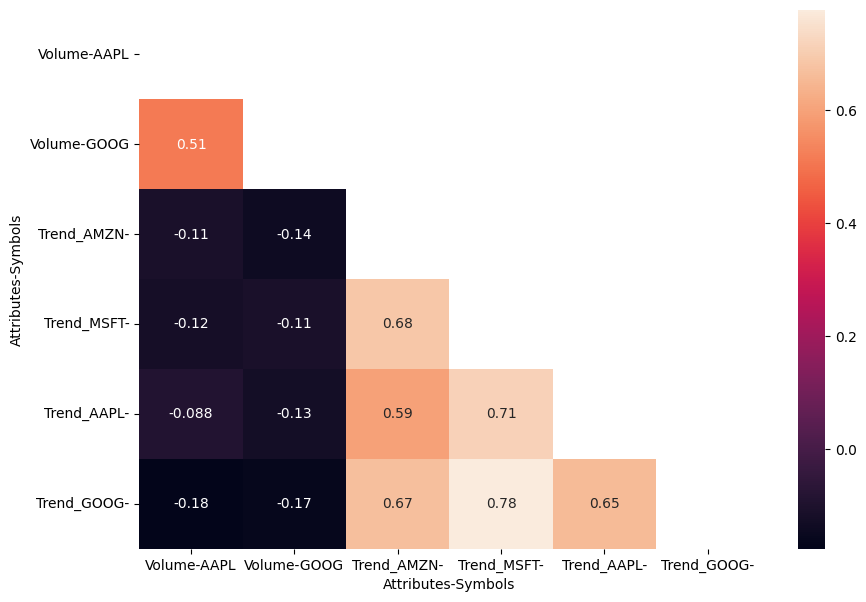

In [72]:
mp.figure(figsize=(10,7))
mask = np.triu(np.ones_like(Stock_Data.iloc[:,20:].corr()))
sns.heatmap(Stock_Data.iloc[:,20:].corr(),mask=mask,annot=True)


### As we can see there is positive correlation among stocks values

### more anaylsis

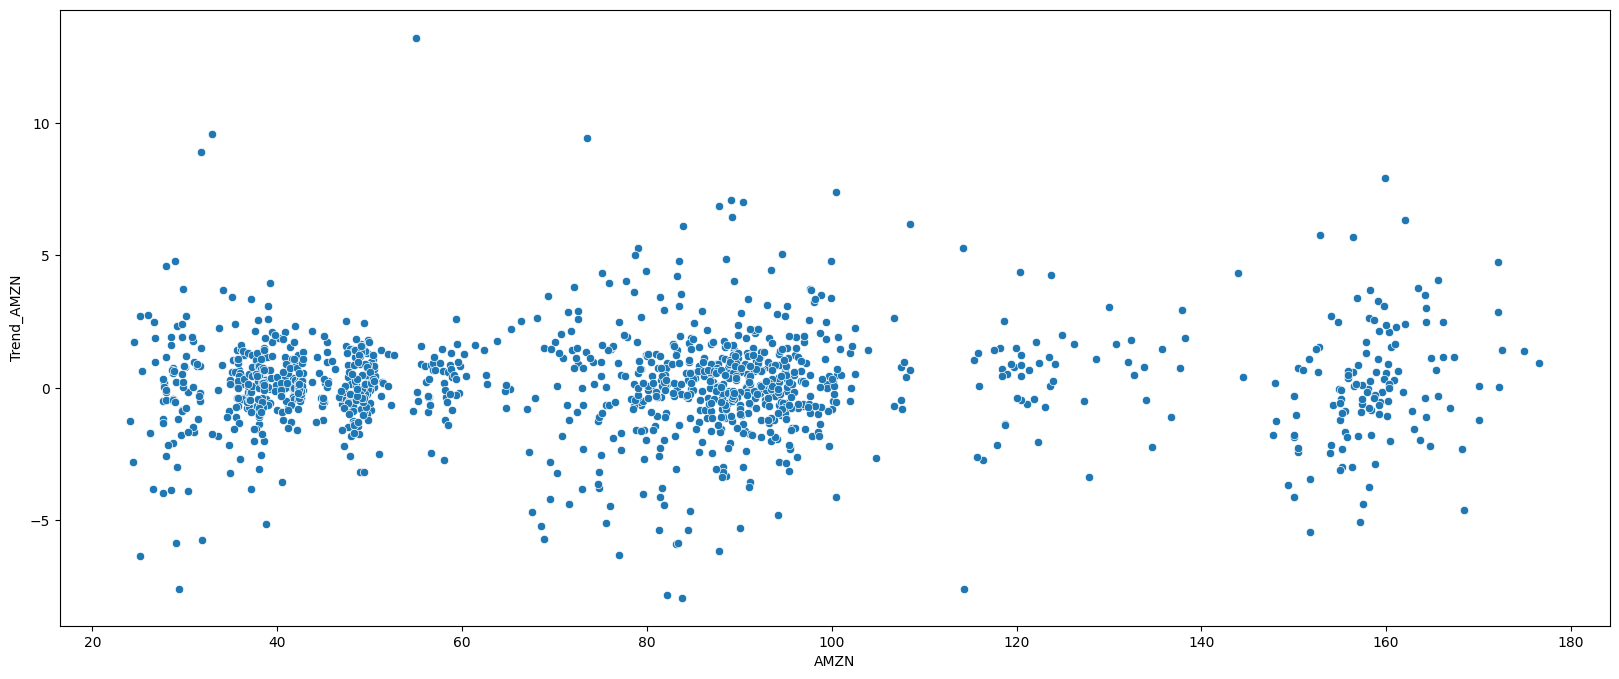

In [73]:
mp.figure(figsize=(20,8))
sns.scatterplot(x=Stock_Data['Close']['AMZN'],y=Stock_Data['Trend_AMZN'])
mp.show()

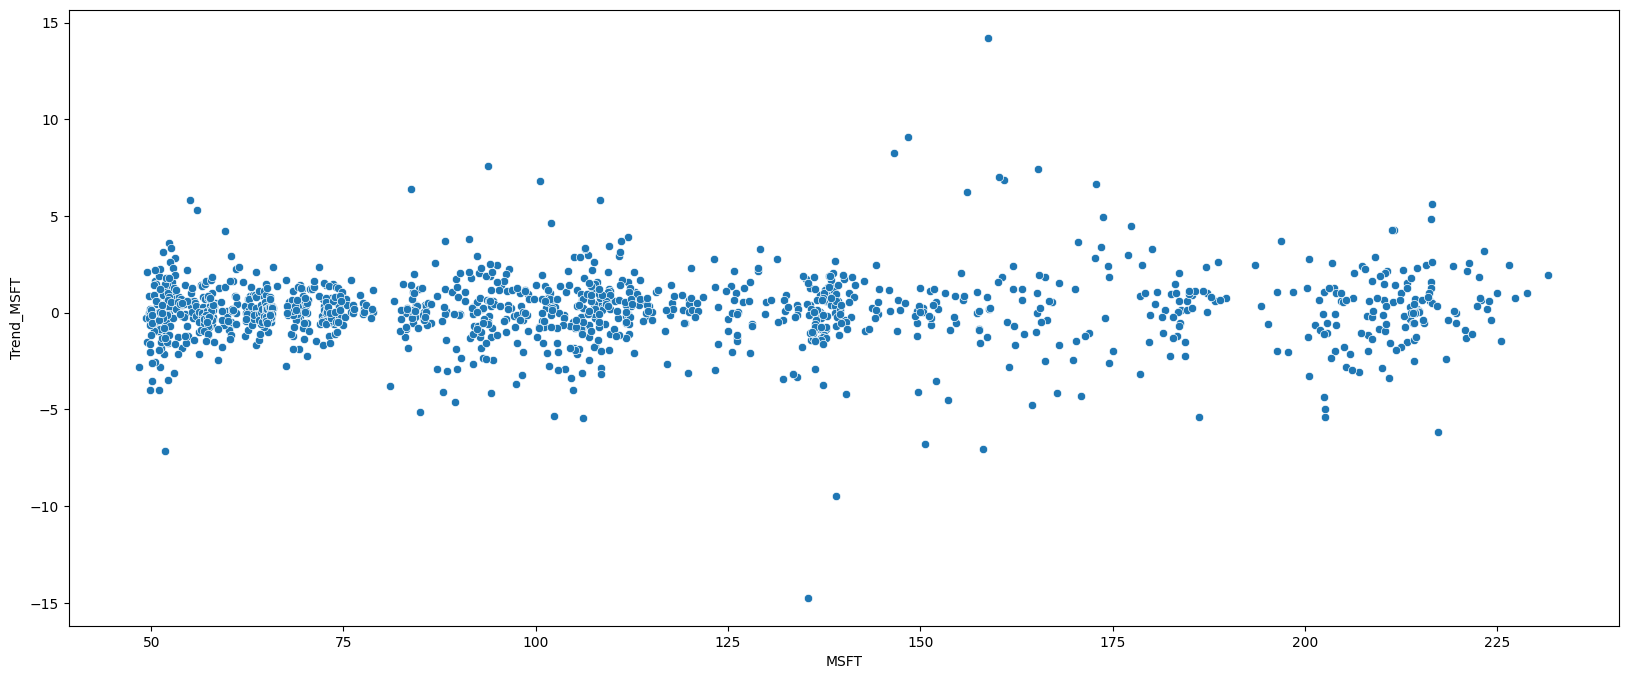

In [74]:
mp.figure(figsize=(20,8))
sns.scatterplot(x=Stock_Data['Close']['MSFT'],y=Stock_Data['Trend_MSFT'])
mp.show()

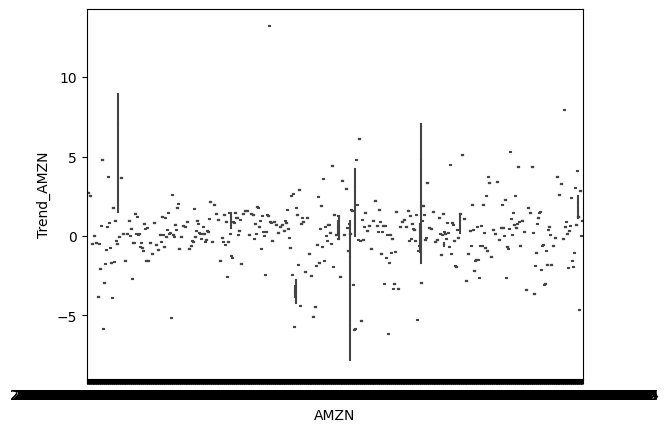

In [75]:
sns.boxplot(x=Stock_Data['Close']['AMZN'],y=Stock_Data['Trend_AMZN'])
mp.show()

In [76]:
Stock_Data['Close']['AMZN'].corr(Stock_Data['Trend_AMZN'])

0.030702248147642205

<Figure size 2000x800 with 0 Axes>

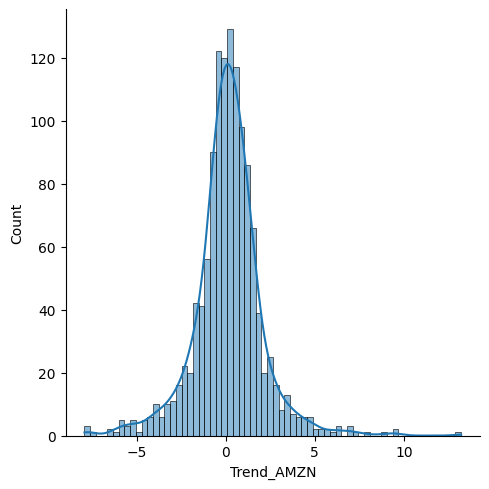

In [79]:
mp.figure(figsize=(20,8))
sns.displot(x=Stock_Data['Trend_AMZN'],kde=True)
mp.show()

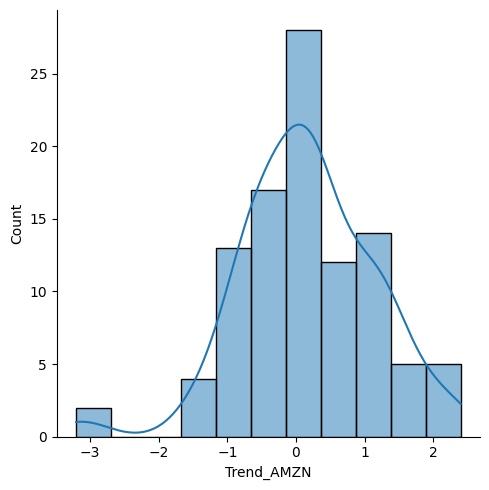

In [81]:
sns.displot(x=Stock_Data['Trend_AMZN'][100:200],kde=True)
mp.show()

GIT HUB LINK OF FILE
https://github.com/Shanezatch/study-material/blob/a962fb5a7bb51eaa116b59630dd8cca83c051bbc/IPYTHON/mini_project_stock_anyalsis.ipynb